In [1]:
import collections
import json
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

In [3]:
df = pd.read_json("output/output_1571662774.json")

In [4]:
df.shape

(1000, 14)

In [5]:
df.dtypes

build_tools               object
clone_url                 object
commit_sha                object
current_timestamp          int64
default_branch            object
fork                        bool
full_name                 object
has_modules              float64
info_from_dockerfiles     object
language                  object
name                      object
number_of_dockerfiles      int64
stargazers_count           int64
tag_name                  object
dtype: object

In [6]:
df.head()

,build_tools,clone_url,commit_sha,current_timestamp,default_branch,fork,full_name,has_modules,info_from_dockerfiles,language,name,number_of_dockerfiles,stargazers_count,tag_name
0,NaN,https://github.com/CyC2018/CS-Notes.git,879d018f95ca67b4042eedc4681ab857d8cde47f,1571662800,master,False,CyC2018/CS-Notes,NaN,NaN,Java,CS-Notes,0,80928,NaN
1,NaN,https://github.com/Snailclimb/JavaGuide.git,888dfc8411d75778f7d680a9e6feaa193a747e61,1571662806,master,False,Snailclimb/JavaGuide,NaN,NaN,Java,JavaGuide,0,58605,NaN
2,[Maven],https://github.com/macrozheng/mall.git,19c3e9c03cdb87da440672c2528f6a9b03a8e336,1571662810,master,False,macrozheng/mall,NaN,NaN,Java,mall,0,23550,NaN
3,[Maven],https://github.com/ityouknow/spring-boot-examp...,dac5cd3d8477742d3bfd66c44d8db4847bed674a,1571662817,master,False,ityouknow/spring-boot-examples,NaN,[{'path': './dockercompose-springboot-mysql-ng...,Java,spring-boot-examples,2,19102,NaN
4,[Maven],https://github.com/alibaba/arthas.git,191a42c28d36b973831708cd97639174ad438330,1571662819,master,False,alibaba/arthas,NaN,"[{'path': './Dockerfile', 'base_images': ['FRO...",Java,arthas,1,17181,arthas-all-3.1.4


### Repositories with no dockerfiles 

In [7]:
(df["number_of_dockerfiles"] == 0).sum()

411

### Repositories with at least one dockerfile

In [8]:
(df["number_of_dockerfiles"] > 0).sum()

589

### Dockerfile distribution over repositories

In [9]:
number_of_dockerfiles_in_repos = df["number_of_dockerfiles"].sort_values().unique()
cols = ["number_of_dockerfiles", "number_of_repos"]
dockerfile_vs_repo_df = pd.DataFrame(columns = cols)
for n in number_of_dockerfiles_in_repos:
    dockerfile_vs_repo_df = dockerfile_vs_repo_df.append(
        {"number_of_dockerfiles": pd.to_numeric(n), "number_of_repos": len(df[df["number_of_dockerfiles"] == pd.to_numeric(n)])},
        ignore_index=True)
dockerfile_vs_repo_df.to_csv(r'analysis_output/dockerfiles_vs_repos.csv', index=False)
dockerfile_vs_repo_df

,number_of_dockerfiles,number_of_repos
0,0,411
1,1,329
2,2,66
3,3,43
4,4,27
5,5,22
6,6,17
7,7,17
8,8,8
9,9,15


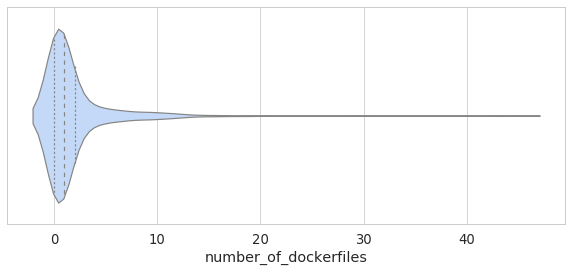

In [10]:
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,4))
plt.xlabel('number of dockerfiles')
ax = sns.violinplot(x="number_of_dockerfiles", data=df, color="#bbd7ff", inner="quartile")

### Most dockerfiles in a repository

In [11]:
df[df["number_of_dockerfiles"] == df["number_of_dockerfiles"].max()]

,build_tools,clone_url,commit_sha,current_timestamp,default_branch,fork,full_name,has_modules,info_from_dockerfiles,language,name,number_of_dockerfiles,stargazers_count,tag_name
955,"[Maven, Gradle]",https://github.com/daggerok/spring-5-examples.git,d6f09913dd033acf2760769f2132fa31b9ced3b1,1571668208,master,False,daggerok/spring-5-examples,NaN,"[{'path': './boot-jsp/gradle/Dockerfile', 'bas...",Java,spring-5-examples,45,52,NaN


### Total number of Dockerfiles

In [12]:
df["number_of_dockerfiles"].sum()

1952

### Repositories that are forks

In [13]:
(df["fork"] == True).sum()

0

### Repositories with releases

In [14]:
(df["tag_name"].notnull()).sum()

405

### Repositories without releases

In [15]:
(df["tag_name"].isnull()).sum()

595

### Build tools vs repositories

In [16]:
build_tools = df["build_tools"].str.len().unique()
for i in range(len(build_tools)):
    if np.isnan(build_tools[i]):
        build_tools[i] = 0
build_tools = build_tools.astype(int)
build_tools

array([0, 1, 2, 3])

In [17]:
build_tool_df = pd.DataFrame({"build_tools": df["build_tools"].str.len()})
build_tool_df.fillna(0, inplace = True)

In [18]:
cols = ["number_of_build_tools", "number_of_repos"]
build_tool_vs_repo_df = pd.DataFrame(columns = cols)
for n in build_tools:
    build_tool_vs_repo_df = build_tool_vs_repo_df.append(
        {"number_of_build_tools": n, "number_of_repos": len(df[build_tool_df["build_tools"] == n])},
        ignore_index=True)
build_tool_vs_repo_df.to_csv(r'analysis_output/build_tools_vs_repos.csv', index=False)
build_tool_vs_repo_df

,number_of_build_tools,number_of_repos
0,0,30
1,1,873
2,2,92
3,3,5


### Repositories with gitmodules

In [19]:
(df["has_modules"] == True).sum()

37

### Default branches

In [20]:
branches = df["default_branch"]
branches.value_counts()

master              929
develop              31
dev                  14
development           3
master_2.11.x         1
version/4.1.0         1
open                  1
rc-2.15               1
maintenance           1
sapmachine            1
hs-master             1
latest                1
release-1.4           1
new/develop           1
feature/v2            1
3.5                   1
7.2.x                 1
3.1-maintenance       1
integration           1
v3.0-master           1
v1                    1
version4              1
release-0.6           1
devel                 1
5.3.1-post            1
v6.2.3-strapdata      1
00-legacy             1
Name: default_branch, dtype: int64

### Dockerfile analysis

In [21]:
repos_with_docker_df = df[pd.notnull(df['info_from_dockerfiles'])]
repos_with_docker_df.reset_index(drop=True, inplace=True)
repos_with_docker_df.shape

(589, 14)

In [22]:
list_of_base_images = []
for index, row in repos_with_docker_df.iterrows():
    for i in range(len(row['info_from_dockerfiles'])):
        for j in range(len(row['info_from_dockerfiles'][i]['base_images'])):
            list_of_base_images.append(row['info_from_dockerfiles'][i]['base_images'][j])

In [23]:
for i in range(len(list_of_base_images)):
    list_of_base_images[i] = re.sub('FROM', '',list_of_base_images[i], flags=re.IGNORECASE)
    list_of_base_images[i] = re.sub(r'( AS).*', '',list_of_base_images[i], flags=re.IGNORECASE)
    list_of_base_images[i] = " ".join(list_of_base_images[i].split())
len(list_of_base_images)

2078

In [24]:
base_image_df = pd.DataFrame(list_of_base_images, columns = ['base_image'])

In [25]:
base_image_df.head()

,base_image
0,maven:3.5-jdk-8
1,openjdk:8-jdk-alpine
2,openjdk:8-jdk-alpine
3,openzipkin/zipkin-builder
4,nginx:1.16-alpine


In [26]:
base_image_df.shape

(2078, 1)

In [27]:
len(base_image_df['base_image'].unique())

656

### Most popular base-image:versions

In [28]:
base_images_with_versions_df = pd.Series(list_of_base_images).value_counts().to_frame()
base_images_with_versions_df.reset_index(inplace=True)
base_images_with_versions_df.columns = ['base-image:version', 'count']
base_images_with_versions_df.to_csv(r'analysis_output/base_image_version_count.csv', index=False)

In [29]:
base_images_with_versions_df.shape

(656, 2)

In [30]:
base_images_with_versions_df.dtypes

base-image:version    object
count                  int64
dtype: object

In [31]:
base_images_with_versions_df.head(30)

,base-image:version,count
0,java:8,122
1,openjdk:8-jdk-alpine,88
2,openjdk:8-jre-alpine,80
3,openjdk:8-jre,47
4,java:8-jre,46
5,ubuntu:16.04,40
6,frolvlad/alpine-oraclejdk8:slim,40
7,java:8-jre-alpine,39
8,busybox:latest,35
9,openjdk:8,32


In [32]:
top_25_df = base_images_with_versions_df[:25].copy()

In [33]:
mypalette = []
for i in range(25):
    if ("java" in top_25_df["base-image:version"][i] or "openjdk" in top_25_df["base-image:version"][i]) and "/" not in top_25_df["base-image:version"][i]:
        mypalette.append("#5382A1")
    elif "ubuntu" in top_25_df["base-image:version"][i]:
        mypalette.append("#E95420")
    else:
        mypalette.append("#FFC425")

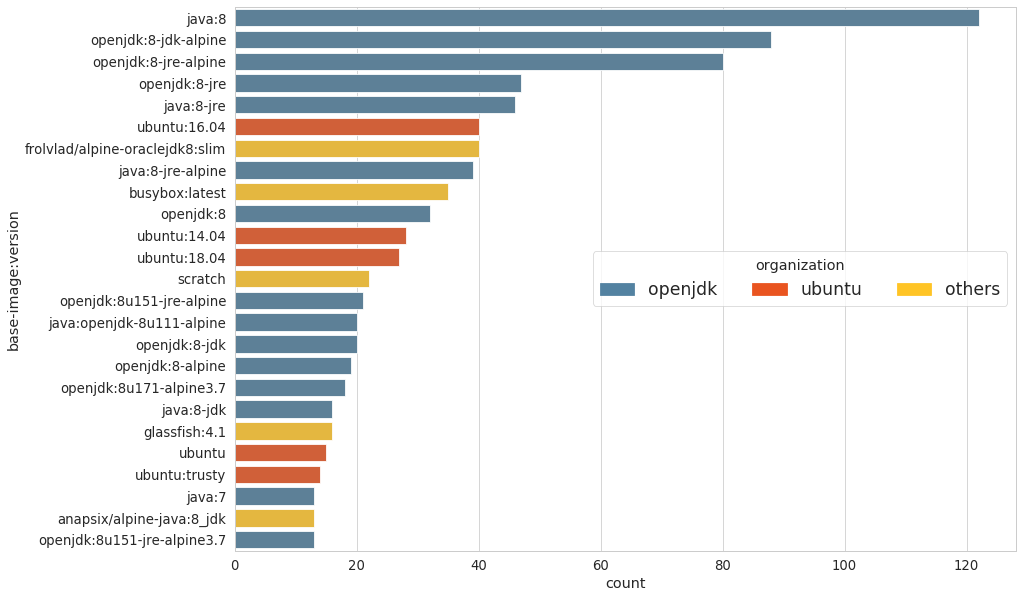

In [34]:
plt.figure(figsize=(14, 10))
ax = sns.barplot(x="count", y="base-image:version", data=top_25_df[:25], palette=mypalette)
openjdk_patch = mpatches.Patch(color='#5382A1', label='openjdk')
ubuntu_patch = mpatches.Patch(color='#E95420', label='ubuntu')
others_patch = mpatches.Patch(color='#FFC425', label='others')
plt.legend(handles=[openjdk_patch, ubuntu_patch, others_patch], title='organization', loc='center right', ncol=3, fontsize="large", frameon=True)

### Base images with Java preinstalled

In [35]:
# ´python find_java_versions.py´
top_25_java_df = pd.read_csv("analysis_output/base_image_version_count_java.csv")
top_25_java_df.fillna('', inplace=True)
top_25_java_df

,base-image:version,count,java_version
0,java:8,122,"openjdk version ""1.8.0_111"""
1,openjdk:8-jdk-alpine,88,"openjdk version ""1.8.0_212"""
2,openjdk:8-jre-alpine,80,"openjdk version ""1.8.0_212"""
3,openjdk:8-jre,47,"openjdk version ""1.8.0_232"""
4,java:8-jre,46,"openjdk version ""1.8.0_111"""
5,ubuntu:16.04,40,
6,frolvlad/alpine-oraclejdk8:slim,40,
7,java:8-jre-alpine,39,"openjdk version ""1.8.0_111-internal"""
8,busybox:latest,35,
9,openjdk:8,32,"openjdk version ""1.8.0_232"""


In [36]:
# Official vs unofficial
mypalette = []
for i in range(25):
    if "/" in top_25_java_df["base-image:version"][i]:
        mypalette.append("#ffbc58")
    else:
        mypalette.append("#5e3c58")

# Java pre-installed
myhatches = []
for i in range(25):
    if not top_25_java_df["java_version"][i]:
        myhatches.append('//')
    else:
        myhatches.append('||')

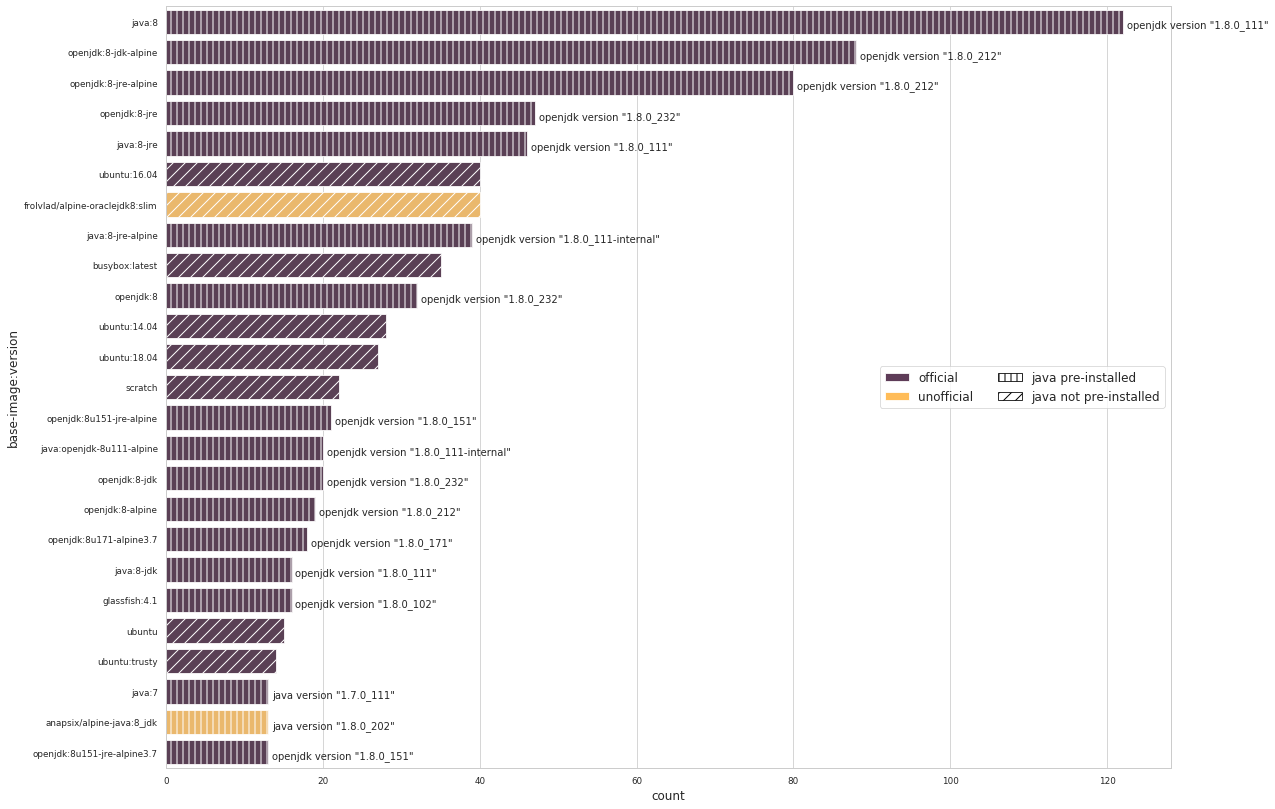

In [37]:
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
plt.figure(figsize=(18, 14))
ax = sns.barplot(x="count", y="base-image:version", data=top_25_java_df, palette=mypalette, edgecolor='#ffffff')

for i, thisbar in enumerate(ax.patches):
    thisbar.set_hatch(myhatches[i])

# Java versions
for i, thisbar in enumerate(ax.patches):
    width = thisbar.get_width()
    ax.text(width + 0.5,
            thisbar.get_y() + thisbar.get_height()/2. + 0.2,
            top_25_java_df["java_version"][i],
            fontsize=10,
            ha="left")

official_patch = mpatches.Patch(edgecolor='#ffffff', facecolor='#5e3c58', label='official')
unofficial_patch = mpatches.Patch(edgecolor='#ffffff', facecolor='#ffbc58', label='unofficial')
no_java_patch = mpatches.Patch(edgecolor='#000000', facecolor='#ffffff', label='java not pre-installed', hatch='//')
java_patch = mpatches.Patch(edgecolor='#000000', facecolor='#ffffff', label='java pre-installed', hatch='||')

plt.legend(handles=[official_patch, unofficial_patch, java_patch, no_java_patch], loc='center right', ncol=2, fontsize="medium", frameon=True)

### Most popular versions of each base image

In [38]:
versions = []
base_image_version_df = pd.DataFrame({"base_image": "", "versions": versions})

In [39]:
for i in range(len(list_of_base_images)):
    output_list = re.split(":", list_of_base_images[i], 1)
    if len(output_list) == 1:
        output_list.append("")
    if output_list[0] not in base_image_version_df["base_image"].values:
        base_image_version_df = base_image_version_df.append(
            {"base_image": output_list[0], "versions": [output_list[1]]}, ignore_index=True)
    if output_list[0] in base_image_version_df["base_image"].values:
        base_image_version_df.loc[base_image_version_df["base_image"] == output_list[0], "versions"] += [output_list[1]]

base_image_version_df.head()

,base_image,versions
0,maven,"[3.5-jdk-8, 3.5-jdk-8, 3-jdk-11-slim, 3.5.4-jd..."
1,openjdk,"[8-jdk-alpine, 8-jdk-alpine, 8-jdk-alpine, 8-j..."
2,openzipkin/zipkin-builder,"[, , ]"
3,nginx,"[1.16-alpine, 1.16-alpine, 1-alpine, stable, ,..."
4,gcr.io/distroless/java,"[11-debug, 11-debug, 11]"


In [40]:
base_image_version_df.to_csv(r'analysis_output/base_image_and_all_versions.csv', index=False)

In [41]:
final_list = []
for i in range(len(base_image_version_df)):
    one_base_image_dict = {}
    one_base_image_dict["base_image"] = base_image_version_df["base_image"][i]
    one_base_image_dict["versions"] = []
    counter = collections.Counter(base_image_version_df["versions"][i]).most_common()
    for version, count in counter:
        one_base_image_dict["versions"].append({"version": version, "count": count})
    final_list.append(one_base_image_dict)
with open("analysis_output/most_popular_versions.json", 'w') as json_file:
    json.dump(final_list, json_file, indent=2)